# Handwritten digit recognition with Keras

In [3]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## The MNIST Data

Get the data:

In [4]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Check the dimensions:

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Look at a couple example images:

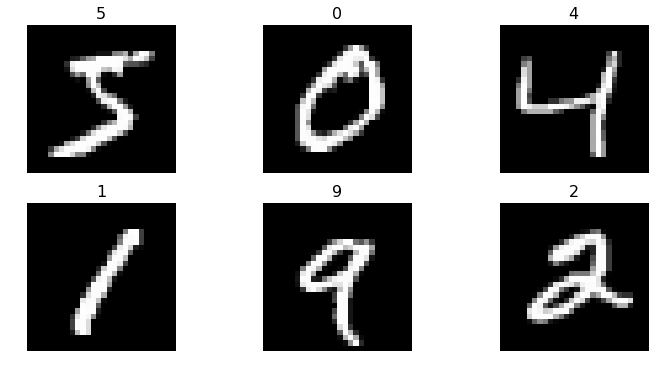

In [6]:
f = plt.figure(figsize=(12,6))
for i in range(6):
    sp = f.add_subplot(2, 3, i+1)
    sp.axis('Off')
    sp.set_title(y_train[i], fontsize=16)
    plt.imshow(x_train[i], cmap='gray')

Vectorize the images, and rescale them into a [0,1] range:

In [7]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


Convert class vectors to one-hot-encoded class matrices:

In [9]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[:3,]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

## Neural network with a single hidden layer

In [10]:
model1 = Sequential()

model1.add(Dense(512, activation='sigmoid', input_shape=(784,)))
model1.add(Dense(num_classes, activation='softmax'))

model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Compile and fit the model:

In [11]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model1.compile(loss='mean_squared_error',
               optimizer=sgd,
               metrics=['accuracy'])

model1.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 58us/step - loss: 0.0886 - acc: 0.1789 - val_loss: 0.0860 - val_acc: 0.2925
Epoch 2/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.0831 - acc: 0.3597 - val_loss: 0.0798 - val_acc: 0.4019
Epoch 3/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.0764 - acc: 0.4717 - val_loss: 0.0726 - val_acc: 0.5391
Epoch 4/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.0692 - acc: 0.5671 - val_loss: 0.0652 - val_acc: 0.6172
Epoch 5/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.0621 - acc: 0.6320 - val_loss: 0.0584 - val_acc: 0.6553
Epoch 6/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.0558 - acc: 0.6767 - val_loss: 0.0522 - val_acc: 0.7050
Epoch 7/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.0502 - acc: 0.7181 - val_loss: 0.0470 - val_acc

Check the score on test data:

In [12]:
score = model1.evaluate(x_test, y_test, verbose=0)
print('Mean squared error on the test data:', score[0])
print('Test accuracy:', score[1])

Mean squared error on the test data: 0.02149169387295842
Test accuracy: 0.8833


Look at some of the missclassified images:

Missclassified: 1167 / 10000


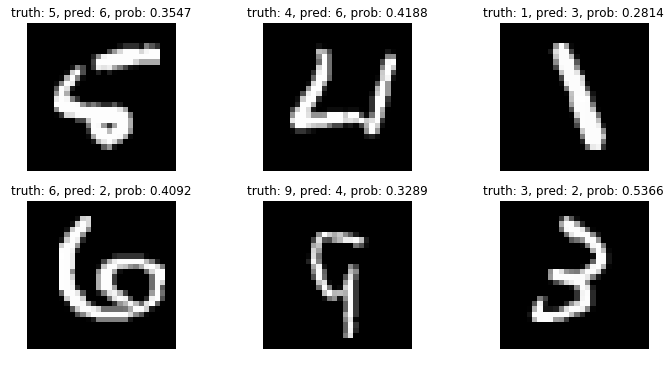

In [13]:
def display_first_6_missclassified(model):
    test_pred = model.predict(x_test)
    n_test = x_test.shape[0]
    misclassified = []

    for i in range(n_test):
        if np.argmax(test_pred[i, :]) != np.argmax(y_test[i, :]):
            misclassified.append(i)
        
    print("Missclassified: {} / {}".format(len(misclassified), n_test))

    first_6_misclassified = misclassified[:6]

    f = plt.figure(figsize=(12,6))
    for i in range(6):
        sp = f.add_subplot(2, 3, i+1)
        img_id = first_6_misclassified[i]
        sp.axis('Off')
        pred_class = np.argmax(test_pred[img_id, :])
        max_prob = np.max(test_pred[img_id, :])
        ground_truth = np.argmax(y_test[img_id, :])
        sp.set_title("truth: {}, pred: {}, prob: {:.4f}".format(ground_truth, pred_class, max_prob), fontsize=12)
        plt.imshow(x_test[img_id].reshape(28, 28), cmap='gray')
        

display_first_6_missclassified(model1)

## Add a couple more layers to the model

![Stack moar layers](https://i.redd.it/5193db0avbey.jpg)

In [14]:
model2 = Sequential()

for i in range(3):
    model2.add(Dense(512, activation='sigmoid', input_shape=(784,)))

model2.add(Dense(num_classes, activation='softmax'))

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 932,362
Trainable params: 932,362
Non-trainable params: 0
_________________________________________________________________


In [15]:
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True) # 10x the learning rate of last model

model2.compile(loss='mean_squared_error',
               optimizer=sgd,
               metrics=['accuracy'])

model2.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.0900 - acc: 0.1219 - val_loss: 0.0898 - val_acc: 0.2036
Epoch 2/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.0896 - acc: 0.1543 - val_loss: 0.0894 - val_acc: 0.1135
Epoch 3/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.0892 - acc: 0.2037 - val_loss: 0.0888 - val_acc: 0.2722
Epoch 4/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.0882 - acc: 0.2447 - val_loss: 0.0874 - val_acc: 0.2033
Epoch 5/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.0846 - acc: 0.2492 - val_loss: 0.0794 - val_acc: 0.2476
Epoch 6/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.0736 - acc: 0.3915 - val_loss: 0.0677 - val_acc: 0.4589
Epoch 7/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.0617 - acc: 0.5303 - val_loss: 0.0536 - val_acc

Lower the learning rate and train some more:

In [16]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) # lower the learning rate

model2.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0149 - acc: 0.9042 - val_loss: 0.0142 - val_acc: 0.9065
Epoch 2/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0146 - acc: 0.9062 - val_loss: 0.0140 - val_acc: 0.9087
Epoch 3/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.0143 - acc: 0.9081 - val_loss: 0.0138 - val_acc: 0.9106
Epoch 4/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.0141 - acc: 0.9092 - val_loss: 0.0135 - val_acc: 0.9112
Epoch 5/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.0138 - acc: 0.9111 - val_loss: 0.0135 - val_acc: 0.9133
Epoch 6/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.0136 - acc: 0.9124 - val_loss: 0.0134 - val_acc: 0.9115
Epoch 7/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.0134 - acc: 0.9137 - val_loss: 0.0130 - val_acc

In [17]:
score = model2.evaluate(x_test, y_test, verbose=0)
print('Mean squared error on the test data:', score[0])
print('Test accuracy:', score[1])

Mean squared error on the test data: 0.011242520724912174
Test accuracy: 0.9278


Missclassified: 722 / 10000


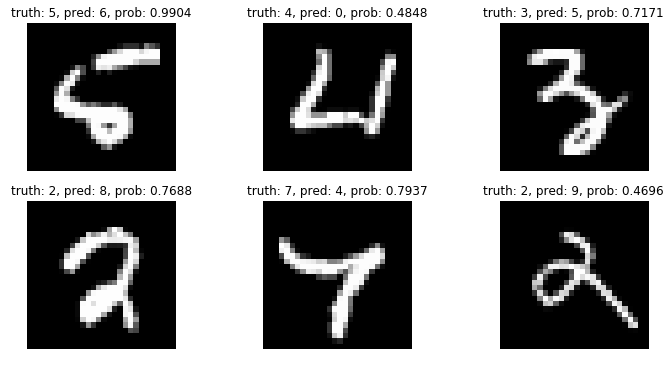

In [18]:
display_first_6_missclassified(model2)

## Categorical crossentropy, ReLU activations, dropout, RMSProp optimizer

Build the model:

In [19]:
model3 = Sequential()

model3.add(Dense(512, activation='relu', input_shape=(784,)))
model3.add(Dropout(0.4))
model3.add(Dense(512, activation='relu'))
model3.add(Dropout(0.4))
model3.add(Dense(512, activation='relu'))
model3.add(Dropout(0.4))

model3.add(Dense(num_classes, activation='softmax'))

model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5130      
Total para

In [20]:
model3.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

model3.fit(x_train, y_train,
           batch_size=128,
           epochs=15,
           verbose=1,
           validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 2s 32us/step - loss: 0.3361 - acc: 0.8969 - val_loss: 0.1296 - val_acc: 0.9614
Epoch 2/15
60000/60000 [==============================] - 2s 27us/step - loss: 0.1566 - acc: 0.9551 - val_loss: 0.1177 - val_acc: 0.9655
Epoch 3/15
60000/60000 [==============================] - 2s 27us/step - loss: 0.1271 - acc: 0.9648 - val_loss: 0.0980 - val_acc: 0.9736
Epoch 4/15
60000/60000 [==============================] - 2s 27us/step - loss: 0.1152 - acc: 0.9690 - val_loss: 0.0893 - val_acc: 0.9780
Epoch 5/15
60000/60000 [==============================] - 2s 27us/step - loss: 0.1063 - acc: 0.9729 - val_loss: 0.0810 - val_acc: 0.9797
Epoch 6/15
60000/60000 [==============================] - 2s 27us/step - loss: 0.1037 - acc: 0.9742 - val_loss: 0.0944 - val_acc: 0.9805
Epoch 7/15
60000/60000 [==============================] - 2s 27us/step - loss: 0.0969 - acc: 0.9763 - val_loss: 0.0954 - val_acc

In [21]:
score = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1037443626440539
Test accuracy: 0.9812


Missclassified: 188 / 10000


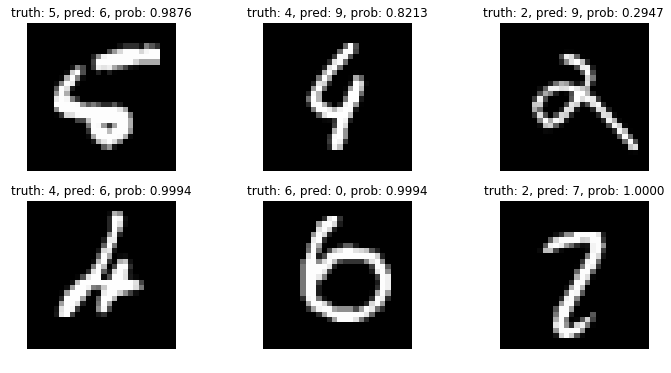

In [22]:
display_first_6_missclassified(model3)

**This are obvious mistakes! We should be able to do better!**

## Convolutional Neural Network

Transform images back into 2D shape:

In [23]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

Define a VGG16 like architecture:

In [24]:
model4 = Sequential()

model4.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model4.add(Conv2D(32, (3, 3), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))

model4.add(Conv2D(64, (3, 3), activation='relu'))
model4.add(Conv2D(64, (3, 3), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))

model4.add(Flatten())
model4.add(Dense(256, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(10, activation='softmax'))

model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
__________

In [25]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model4.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

model4.fit(x_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 210us/step - loss: 0.2616 - acc: 0.9152 - val_loss: 0.0459 - val_acc: 0.9854
Epoch 2/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.0821 - acc: 0.9749 - val_loss: 0.0323 - val_acc: 0.9895
Epoch 3/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.0625 - acc: 0.9815 - val_loss: 0.0250 - val_acc: 0.9915
Epoch 4/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.0526 - acc: 0.9841 - val_loss: 0.0246 - val_acc: 0.9926
Epoch 5/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.0452 - acc: 0.9860 - val_loss: 0.0214 - val_acc: 0.9932
Epoch 6/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.0421 - acc: 0.9869 - val_loss: 0.0217 - val_acc: 0.9932
Epoch 7/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.0380 - acc: 0.9883 - val_loss: 0.

Check the performance on the test dataset:

In [26]:
score = model4.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.017343392529958146
Test accuracy: 0.9947


Missclassified: 53 / 10000


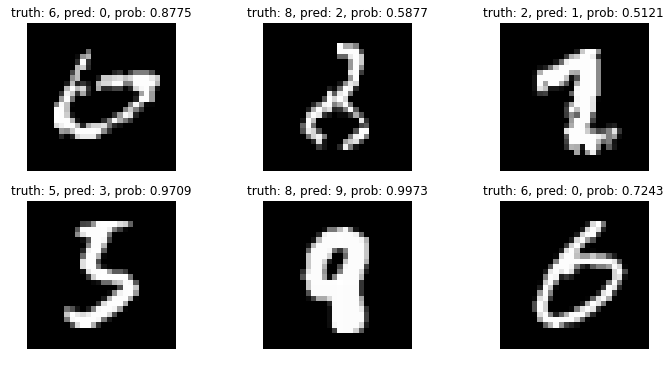

In [27]:
display_first_6_missclassified(model4)